Searching for some better parameters than used in `old/genderClassificationV4.ipynb` using `validation_curve`

We shall only estimate parameters for `GBC` which are the following:
`learning_rate`,     default = `0.1`

`max_features`,      default = `sqrt`

`max_depth`,         default = `15`

`min_samples_split`, default = `1000`

`min_samples_leaf`,  default = `50`

`n_estimators`,      default = `200`

In [1]:
param_dict = {
    "learning_rate": 0.1,
    "max_features": 'sqrt',
    "max_depth": 15,
    "min_samples_split": 1000,
    "min_samples_leaf": 50,
    "n_estimators": 200
}

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from pathlib import Path

np.printoptions(precision=3)

In [3]:
base = Path().resolve().parents[1] / r'data/subsets/gender_final_small'
locations = [str(base) + str(i) + '.csv' for i in range(1, 10)]

# Have 9000 names sampled at random.
X = pd.concat([pd.read_csv(location) for location in locations], axis=0)
y = X["Gender"]
X.drop(labels="Gender", inplace=True, axis=1)

In [4]:
# vectorize and convert to floats
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2,10),
                             decode_error='replace', binary=True)
X = vectorizer.fit_transform(X['Name'])

scaler = MaxAbsScaler()
X = scaler.fit_transform(X)

In [5]:
# Create an instance of GBC
gb_clf = GradientBoostingClassifier(learning_rate=param_dict["learning_rate"],
                                    n_estimators=param_dict["n_estimators"],
                                    max_features=param_dict["max_features"],
                                    max_depth=param_dict["max_depth"],
                                    min_samples_split=param_dict["min_samples_split"],
                                    min_samples_leaf=param_dict["min_samples_leaf"],
                                    verbose=1,
                                    random_state=0)

### Learning Rate

In [6]:
param_range = np.linspace(0.5, 1.5, 20)
param_name = 'learning_rate'
train_score, valid_score = validation_curve(gb_clf,
                                            X, y, param_name,
                                            param_range, n_jobs=-1, verbose=2)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  60 | elapsed:   28.0s remaining:   28.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   35.9s finished


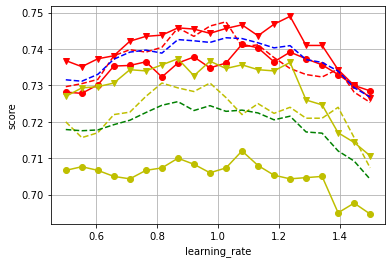

In [7]:
plt.plot(param_range, train_score[:, 0], 'r--',
         param_range, valid_score[:, 0], 'y--',
         param_range, train_score[:, 1], 'ro-',
         param_range, valid_score[:, 1], 'yo-',
         param_range, train_score[:, 2], 'rv-',
         param_range, valid_score[:, 2], 'yv-',
         param_range, np.average(train_score, axis=1), 'b--',
         param_range, np.average(valid_score, axis=1), 'g--')
plt.xlabel(param_name)
plt.ylabel('score')
plt.grid(True)

In [8]:
max_average_train = np.argmax(np.average(train_score, axis=1))
max_average_valid = np.argmax(np.average(valid_score, axis=1))
print(round(param_range[max_average_train], 3),
      round(param_range[max_average_valid], 3))

1.026 0.868


####  _Result_->Learning Rate: 0.85

In [9]:
param_dict["learning_rate"] = 0.85

### Max Features

In [10]:
param_range = ['sqrt', 'log2', 0.01, 0.05, 0.1]
graph_range = np.arange(1, len(param_range)+1)
param_name = 'max_features'
train_score, valid_score = validation_curve(gb_clf,
                                            X, y, param_name,
                                            param_range, n_jobs=-1, verbose=2)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   12.1s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.2min finished


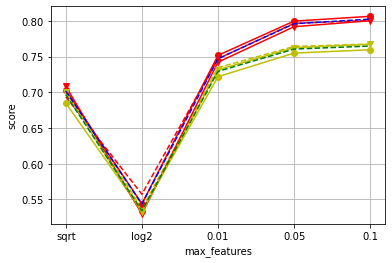

In [11]:
plt.plot(graph_range, train_score[:, 0], 'r--',
         graph_range, valid_score[:, 0], 'y--',
         graph_range, train_score[:, 1], 'ro-',
         graph_range, valid_score[:, 1], 'yo-',
         graph_range, train_score[:, 2], 'rv-',
         graph_range, valid_score[:, 2], 'yv-',
         graph_range, np.average(train_score, axis=1), 'b--',
         graph_range, np.average(valid_score, axis=1), 'g--')
plt.xlabel(param_name)
plt.ylabel('score')
plt.xticks(ticks=graph_range, labels=param_range)
plt.grid(True)

In [12]:
max_average_train = np.argmax(np.average(train_score, axis=1))
max_average_valid = np.argmax(np.average(valid_score, axis=1))
print(param_range[max_average_train],
      param_range[max_average_valid])

0.1 0.1


#### _Results_-> Max Features: 0.05
Even though the results are better at 0.1, there is only a slight increase whereas number of features considered at
each split is doubled. I don't see any solid reason to increase it beyond 0.1 unless I didn't happen to mind
the increase in training time(which I do).

Increasing it beyond 0.1 would undoubtedly lead to an increase in bias which is already evident from `0.01` to `0.1` range

In [ ]:
param_dict["max_features"] = 0.05